<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
import random
import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import display, display_markdown


random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы обеспечить воспроизводимость результатов, так как иначе будут каждый раз разные результаты на одних и тех же данных.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
display_markdown(
    "<h3>30 случайных строк тренировочного датасета</h3>",
    raw=True
)
display(df_train.sample(30, random_state=42))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Первые 5 объектов тестового датасета</h3>",
    raw=True
)
display(df_test.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Последние 5 объектов тестового датасета</h3>",
    raw=True
)
display(df_test.tail())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Колонки с пропусками в тренировочном датасете:</h3>",
    raw=True
)
df_train_with_nulls = df_train.isna().sum()
df_train_with_nulls = df_train_with_nulls[df_train_with_nulls > 0]
display(df_train_with_nulls)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Колонки с пропусками в тестовом датасете:</h3>",
    raw=True
)
df_test_with_nulls = df_test.isna().sum()
df_test_with_nulls = df_test_with_nulls[df_test_with_nulls > 0]
display(df_test_with_nulls)

display_markdown("<hr>", raw=True)

display_markdown(
    f"<h3>Количество дубликатов в тренировочном датасете: {df_train.duplicated().sum()}</h3>",
    raw=True
)

display_markdown("<hr>", raw=True)

display_markdown(
    f"<h3>Количество дубликатов в тестовом датасете: {df_test.duplicated().sum()}</h3>",
    raw=True
)

display_markdown("<hr>", raw=True)

<h3>30 случайных строк тренировочного датасета</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


<hr>

<h3>Первые 5 объектов тестового датасета</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


<hr>

<h3>Последние 5 объектов тестового датасета</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


<hr>

<h3>Колонки с пропусками в тренировочном датасете:</h3>

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

<hr>

<h3>Колонки с пропусками в тестовом датасете:</h3>

mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

<hr>

<h3>Количество дубликатов в тренировочном датасете: 985</h3>

<hr>

<h3>Количество дубликатов в тестовом датасете: 62</h3>

<hr>

**Ответы на вопросы:**
1. Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
    - Можно посмотреть какие есть столбцы, сколько их, какого типа данные они хранят, например, числа или категории или может просто строки
    - Можно если повезет найти объект с пропусками
    - Нельзя оценить количество дубликатов, пропусков или аномальных значений, для этого нужно проанализировать весь датасет или хотя бы большую его часть
2. Достаточно ли метода duplicated для анализа дубликатов? Почему?
    - Не всегда достаточно, так как не учитываются ошибки в значениях, так как может быть два одинаковых объекта, но в одном будет, например, опечатка в названии автомобиля
    или одна и та же машина будет иметь разную цену продажи, что в реальности невозможно (если конечно не нашли две индентичные машины с одинаковыми характеристиками и пробегом)

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемое значение (у нас — медиана) вы считаете по *тренировочному* набору данных и им же заполняете *тестовый*.

In [6]:
# Странно конечно, что мы сейчас избавляемся от пропусков, а потом уже приводим значения в столбцах с пропусками к нормальному виду без приписок величин

# На прошлом этапе были получены датафреймы со столбцами в которых есть пропуски как для трейна так и для теста и они совпали
# Так как у нас 4 из 5 столбцов строковые и чтобы не начинать преобразовывать их раньше времени для них будет использоваться mode(), а для seats - median()
columns_with_nulls = df_train_with_nulls.index.to_list()


def get_median(values: pd.Series) -> str:
    if pd.api.types.is_object_dtype(values):
        return values.mode(dropna=True)[0]

    if pd.api.types.is_numeric_dtype(values):
        return values.median(skipna=True)


medians_values = {}
for column_name in columns_with_nulls:
    medians_values[column_name] = get_median(df_train[column_name])

display_markdown(
    "<h3>Значения для заполнения из тренировочного датасета:</h3>",
    raw=True
)
display(medians_values)

display_markdown("<hr>", raw=True)

df_train_filled = df_train.fillna(medians_values)
df_test_filled = df_test.fillna(medians_values)

# Проверим
display_markdown(
    "<h3>Количество пропусков в тренировочном датасете:</h3>",
    raw=True
)
display(df_train_filled.isna().sum())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Количество пропусков в тестовом датасете:</h3>",
    raw=True
)
display(df_test_filled.isna().sum())

display_markdown("<hr>", raw=True)

<h3>Значения для заполнения из тренировочного датасета:</h3>

{'mileage': '18.9 kmpl',
 'engine': '1248 CC',
 'max_power': '74 bhp',
 'torque': '190Nm@ 2000rpm',
 'seats': np.float64(5.0)}

<hr>

<h3>Количество пропусков в тренировочном датасете:</h3>

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

<hr>

<h3>Количество пропусков в тестовом датасете:</h3>

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

<hr>

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
columns_without_target = df_train_filled.drop(["selling_price"], axis=1).columns.to_list()
df_train_duplicates_mask = df_train_filled.duplicated(columns_without_target)

display_markdown(
    f"<h3>Количество дубликатов в тренировочном датасете без учета selling_price столбца: {df_train_duplicates_mask.sum()}</h3>",
    raw=True
)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Пример данных дубликатов:</h3>",
    raw=True
)
display(df_train_filled[df_train_duplicates_mask].sort_values(by=columns_without_target).head(10))

display_markdown("<hr>", raw=True)

# Применяем все наши этапу к изначальнмоу тренировочному датасету, чтобы пройти assert :)
df_train = df_train_filled.drop_duplicates(columns_without_target, keep="first").reset_index(drop=True)
df_test = df_test_filled.copy()

<h3>Количество дубликатов в тренировочном датасете без учета selling_price столбца: 1159</h3>

<hr>

<h3>Пример данных дубликатов:</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1784,BMW 3 Series 320d Luxury Line,2012,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0
4050,BMW 3 Series 320d Luxury Line Plus,2017,2600000,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0
1787,BMW 3 Series 320d Luxury Plus,2013,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0


<hr>

In [8]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [9]:
# Просто удалить суффикс в виде величины измерения не получится, так как оказалось, что в том же mileage есть km/kg
# Также не получиться с помощью split(), так как оказалось, что там есть значения состоящие из одно лишь суффикса
# Поэтому придеться применить библиотеку re для преобразования и заполнять пропуски медианными значениями или модами, которые мы вычислили в самом начале

df_train_modified = df_train.drop(["torque"], axis=1)
df_test_modified = df_test.drop(["torque"], axis=1)

float_template = re.compile(r"\d+\.?\d*")


def get_float(value: str, column_name: str) -> float:
    match = float_template.search(value)

    if match:
        return float(match[0])
    
    return float(float_template.search(medians_values[column_name])[0])


for column_name in ("mileage", "engine", "max_power"):
    df_train_modified[column_name] = df_train_modified[column_name].apply(get_float, args=(column_name,))
    df_test_modified[column_name] = df_test_modified[column_name].apply(get_float, args=(column_name,))

display_markdown(
    "<h3>Посмотрим, есть ли пропуски в тренировочном датасете:</h3>",
    raw=True
)
display(df_train_modified.isna().sum())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Посмотрим, есть ли пропуски в тестовом датасете:</h3>",
    raw=True
)
display(df_test_modified.isna().sum())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Теперь тренировочный датасет выглядит так:</h3>",
    raw=True
)
display(df_train_modified.head(10))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Теперь тестовый датасет выглядит так:</h3>",
    raw=True
)
display(df_test_modified.head(10))

<h3>Посмотрим, есть ли пропуски в тренировочном датасете:</h3>

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

<hr>

<h3>Посмотрим, есть ли пропуски в тестовом датасете:</h3>

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

<hr>

<h3>Теперь тренировочный датасет выглядит так:</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0


<hr>

<h3>Теперь тестовый датасет выглядит так:</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.0,5.0
5,Mahindra Thar CRDe,2019,975000,12584,Diesel,Dealer,Manual,First Owner,16.55,2498.0,105.0,6.0
6,Chevrolet Spark 1.0 LS,2011,150000,35000,Petrol,Individual,Manual,First Owner,18.00,995.0,62.0,5.0
7,Maruti Ritz ZXi,2012,275000,70000,Petrol,Individual,Manual,Second Owner,18.50,1197.0,85.8,5.0
8,Maruti Alto LX,2011,140000,72000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.3,5.0
9,Hyundai Creta 1.6 CRDi SX,2016,850000,58000,Diesel,Individual,Manual,First Owner,19.67,1582.0,126.2,5.0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [10]:
df_train = df_train_modified.copy()
df_test = df_test_modified.copy()

for column_name in ("engine", "seats"):
    df_train[column_name] = df_train[column_name].apply(int)
    df_test[column_name] = df_test[column_name].apply(int)

display_markdown(
    "<h3>Теперь тренировочный датасет выглядит так:</h3>",
    raw=True
)
display(df_train.head(10))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Теперь тестовый датасет выглядит так:</h3>",
    raw=True
)
display(df_test.head(10))

<h3>Теперь тренировочный датасет выглядит так:</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.50,5
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,5
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461,108.45,5


<hr>

<h3>Теперь тестовый датасет выглядит так:</h3>

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.0,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.5,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.0,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.6,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.0,5
5,Mahindra Thar CRDe,2019,975000,12584,Diesel,Dealer,Manual,First Owner,16.55,2498,105.0,6
6,Chevrolet Spark 1.0 LS,2011,150000,35000,Petrol,Individual,Manual,First Owner,18.00,995,62.0,5
7,Maruti Ritz ZXi,2012,275000,70000,Petrol,Individual,Manual,Second Owner,18.50,1197,85.8,5
8,Maruti Alto LX,2011,140000,72000,Petrol,Individual,Manual,Second Owner,19.70,796,46.3,5
9,Hyundai Creta 1.6 CRDi SX,2016,850000,58000,Diesel,Individual,Manual,First Owner,19.67,1582,126.2,5


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [11]:
display_markdown(
    "<h3>Основная статистика тренировочного датасета по числовым столбцам:</h3>",
    raw=True
)
display(df_train.describe().round(2))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Основная статистика тренировочного датасета по категориальным столбцам:</h3>",
    raw=True
)
display(df_train.describe(include="object"))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Основная статистика тестового датасета по числовым столбцам:</h3>",
    raw=True
)
display(df_test.describe().round(2))

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Основная статистика тестового датасета по категориальным столбцам:</h3>",
    raw=True
)
display(df_test.describe(include="object"))

<h3>Основная статистика тренировочного датасета по числовым столбцам:</h3>

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,522960.09,73952.24,19.42,1429.45,87.66,5.43
std,4.10,535432.00,60071.14,3.99,485.66,31.72,0.98
min,1983.00,29999.00,1.00,0.00,624.00,0.00,2.00
25%,2011.00,250000.00,39000.00,16.95,1197.00,68.00,5.00
50%,2014.00,405000.00,70000.00,19.10,1248.00,81.80,5.00
75%,2017.00,640000.00,100000.00,22.30,1498.00,99.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


<hr>

<h3>Основная статистика тренировочного датасета по категориальным столбцам:</h3>

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


<hr>

<h3>Основная статистика тестового датасета по числовым столбцам:</h3>

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2013.68,617901.04,71393.34,19.33,1454.88,90.69,5.40
std,4.01,758553.86,48486.22,3.95,522.00,34.95,0.91
min,1995.00,31000.00,1303.00,0.00,624.00,34.20,4.00
25%,2011.00,250000.00,37000.00,16.55,1197.00,69.00,5.00
50%,2014.00,434999.00,61500.00,19.25,1248.00,82.42,5.00
75%,2017.00,670000.00,100000.00,22.30,1582.00,102.00,5.00
max,2020.00,6000000.00,375000.00,32.26,3604.00,280.00,9.00


<hr>

<h3>Основная статистика тестового датасета по категориальным столбцам:</h3>

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## Выводы:
1. **Числовые признаки**
    - Пропуски и дубликаты отсутствуют в обоих датасетах
    - Распределения +- совпадают, сдвига распределения не наблюдается, разве что максимальные и минимальные значения в некоторых столбцах отличаются между датасетами
2. **Категориальные признаки**
    - Пропуски и дубликаты отсутствуют в обоих датасетах
    - Количество уникальных значений и самое популярное значение для полей `fuel`, `seller_type`, `transmission` и `owner` в датасетах совпадают, что замечательно, так как не будет проблем с неизвестными значениями
    - Частота если брать в соотношении к количеству объектов +- совпадает

In [12]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
- Можно ли предположить на основе распределений связь признаков с целевой переменной?
- Можно ли на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

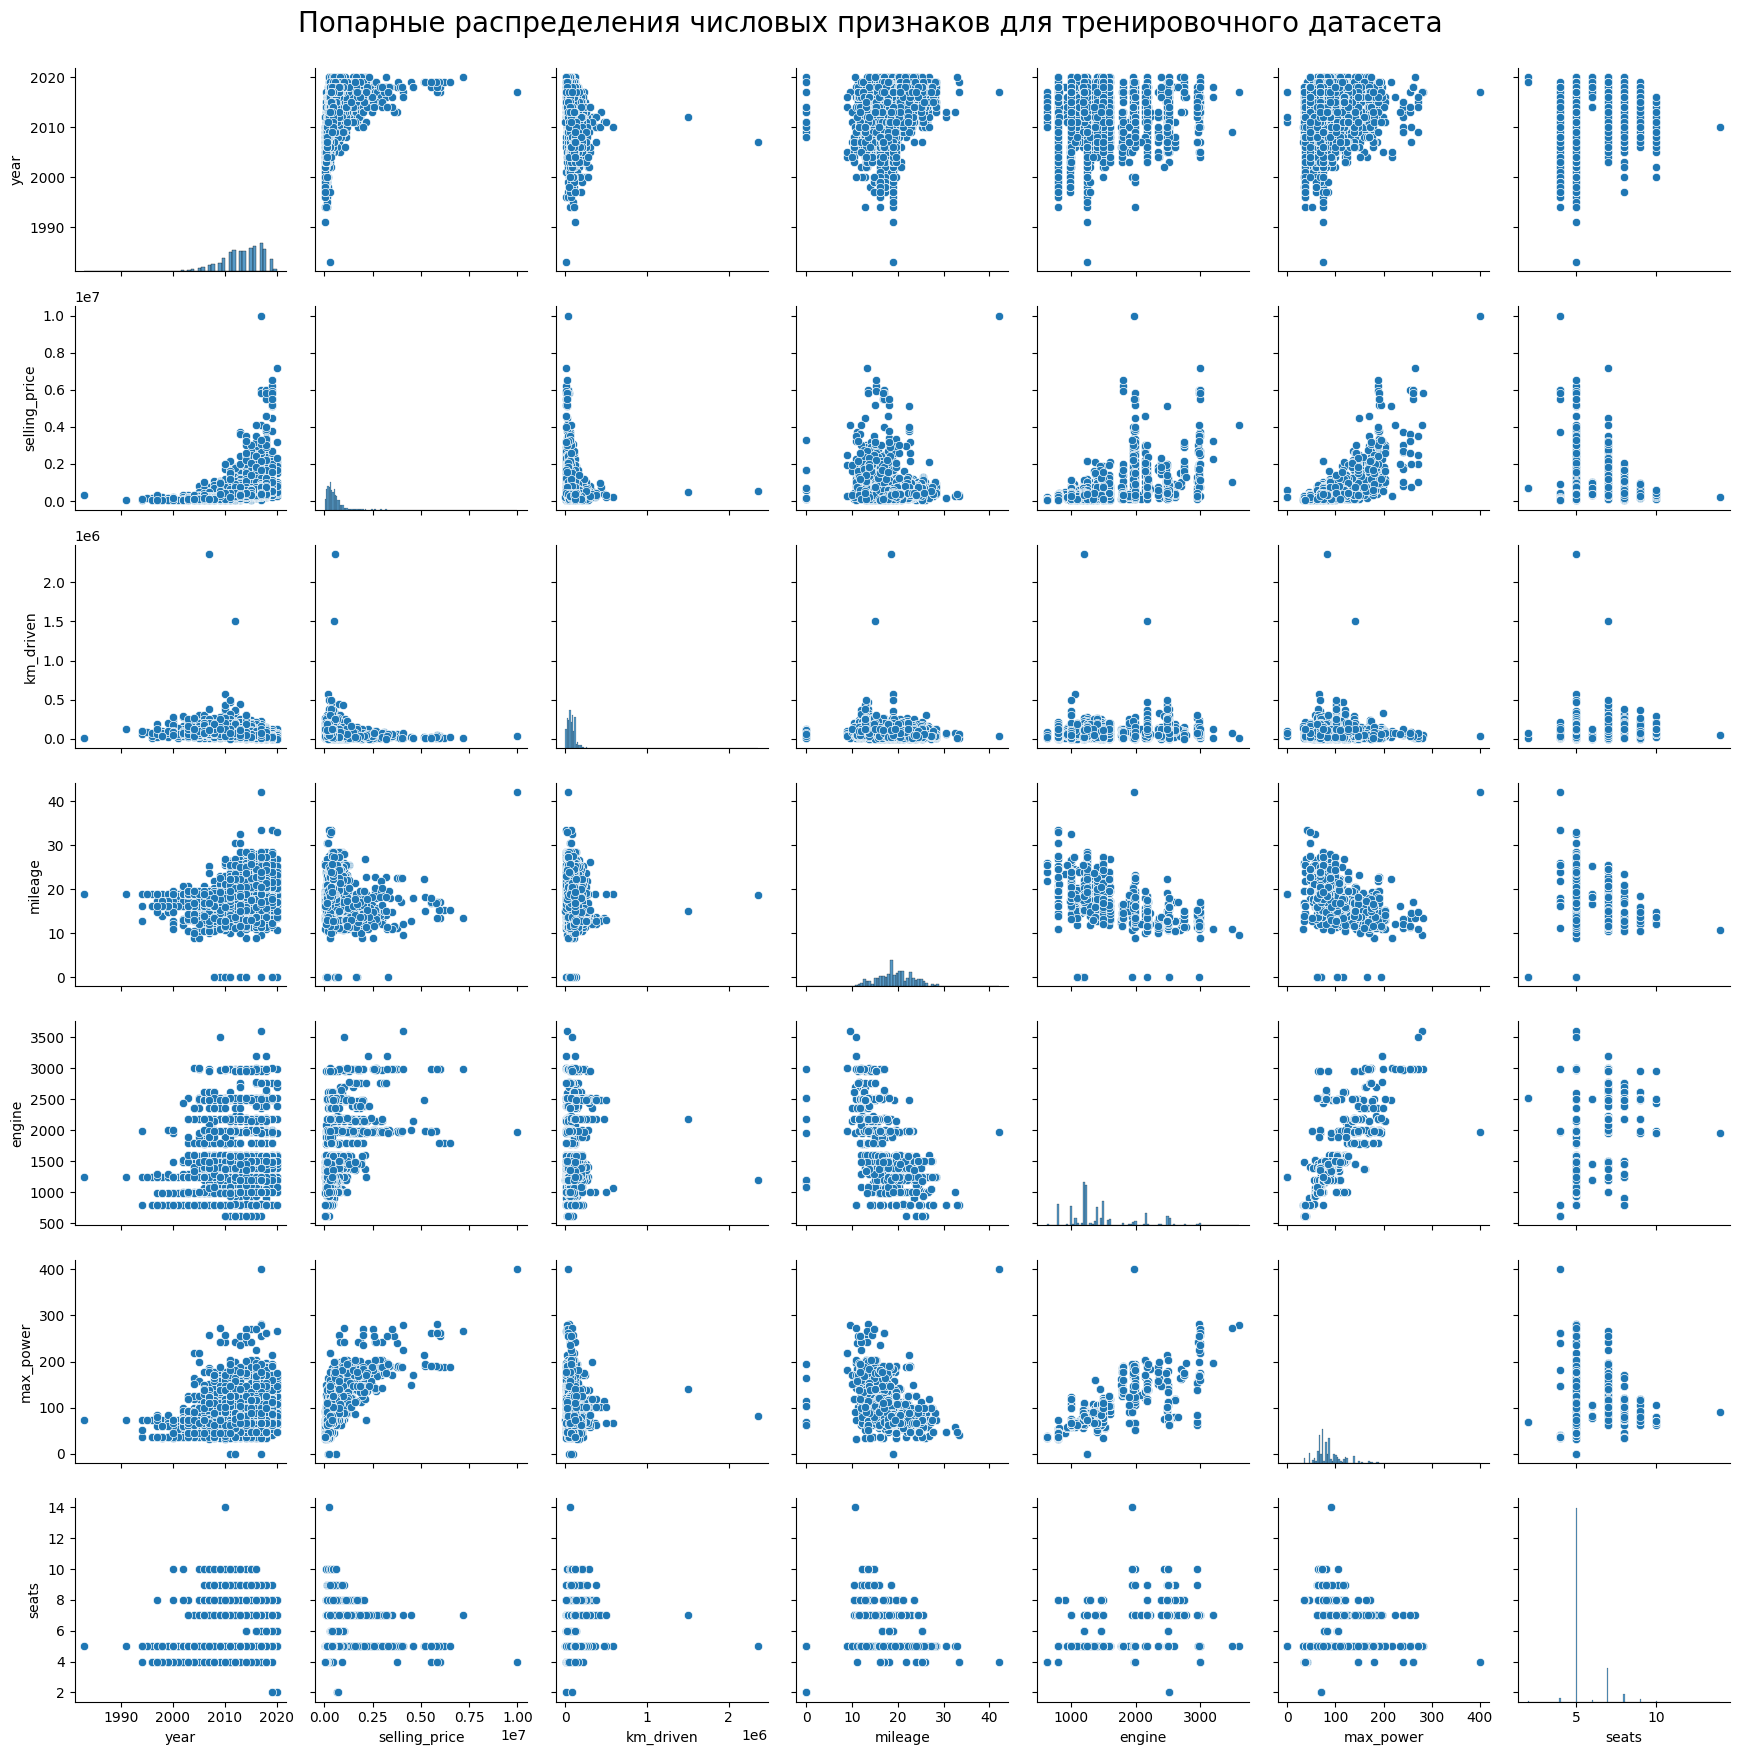

In [13]:
sns.pairplot(df_train)

plt.suptitle("Попарные распределения числовых признаков для тренировочного датасета", fontsize=20, y=1)

plt.tight_layout()
plt.show()

**Ответы на вопросы:**
1. Можно ли предположить на основе распределений связь признаков с целевой переменной?
    - `year` - чем выше год выпуска, тем больше машин имеют высокую цену
    - `km_driven`- чем меньше пробег тем выше цена у большинства машин
    - `engine` и `max_power`- не такая сильная связь c ценой, но все же прослеживается зависимость чем больше мощность и объем двигателя тем больше цена
2. Можно ли на основе распределений выдвинуть гипотезу о корреляциях признаков?
    - `engine` и `max_power`- имеют сильную корреляцию, что и логично в целом, так как больший объем двигателя может дать больше мощности
    - `year` и `km_driven`- из графиков не коррелируют, хотя странно, так как логично, что чем позже машину выпустили тем больше может быть пробег, видимо продавали только новые автомобоили, или слегка подержанные

Я бы убрал `engine`, так как `max_power` будет достаточно как будто

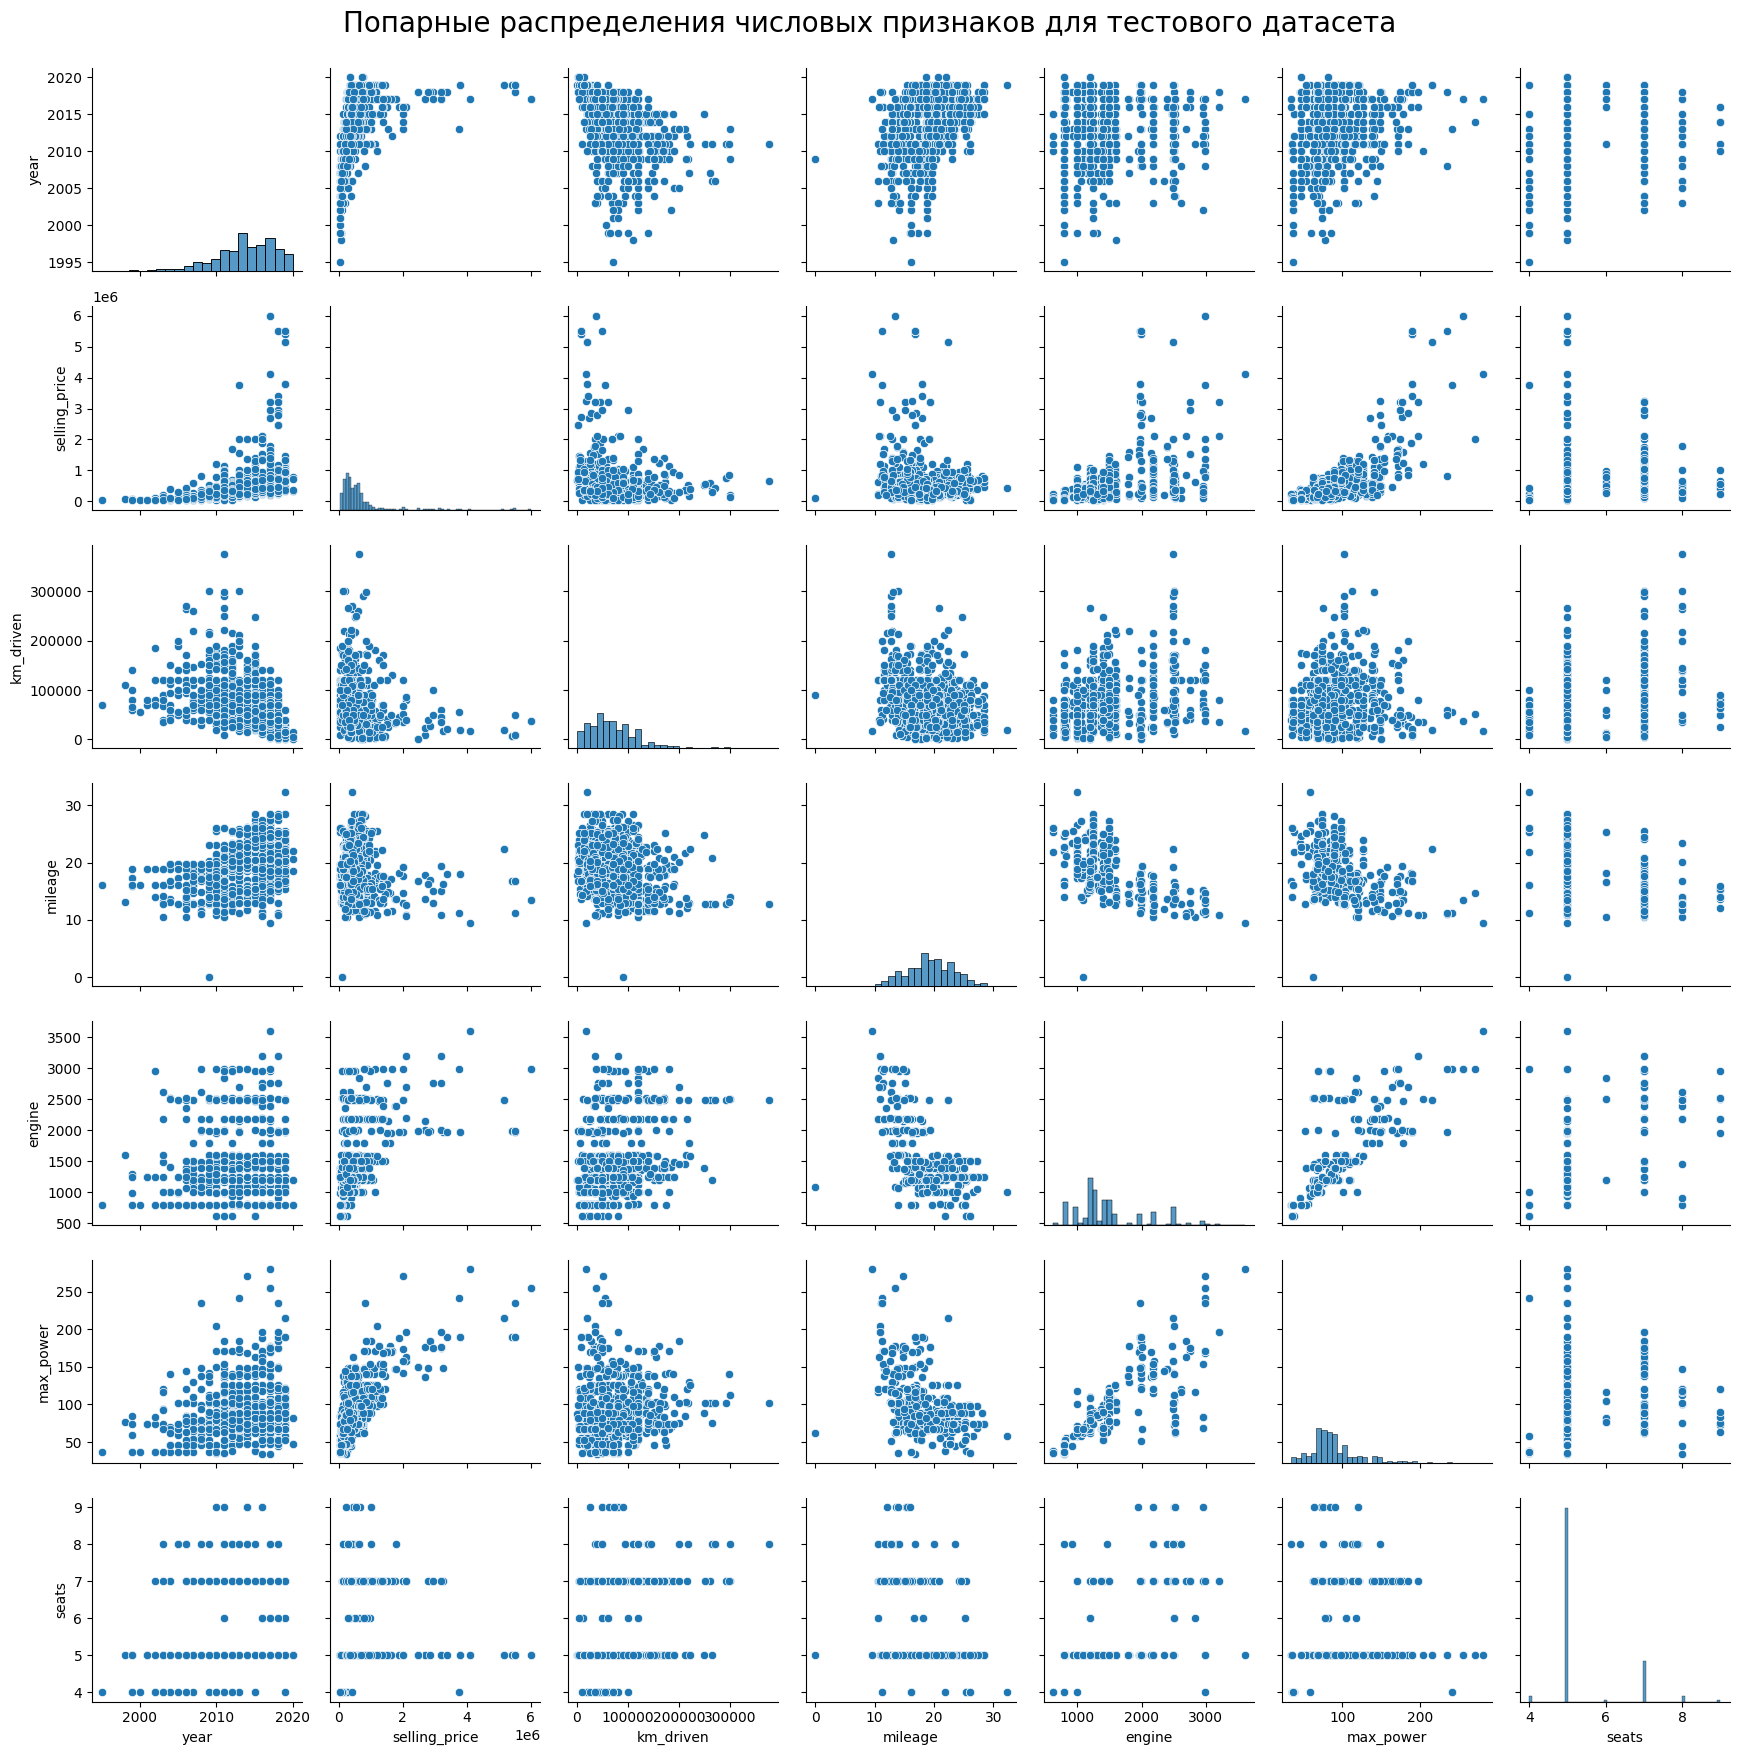

In [14]:
sns.pairplot(df_test)

plt.suptitle("Попарные распределения числовых признаков для тестового датасета", fontsize=20, y=1)

plt.tight_layout()
plt.show()

**Ответы на вопросы:**
1. Похожими ли оказались совокупности при разделении на трейн и тест?
    - `engine` и `max_power` - также имееют корреляцию, пусть, а вот `km_driven` и `max_power`
    - `mileage` и `engine` - появилась более выраженная связь: чем больше объем двигателя тем тем меньше расход. Тоже самое прослеживается и в связи с `max_power` и `mileage`

А так, в общем, все остальное похоже

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<h3>Коэффициенты корреляции Пирсона для тренировочного датасета:</h3>

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.346899,0.002819,0.168507,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.102658,0.447672,0.695503,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.183123,0.229766,0.022216,0.192328
mileage,0.346899,-0.102658,-0.183123,1.000000,-0.571335,-0.370415,-0.449306
engine,0.002819,0.447672,0.229766,-0.571335,1.000000,0.682420,0.652172
max_power,0.168507,0.695503,0.022216,-0.370415,0.682420,1.000000,0.246781
seats,0.041178,0.149953,0.192328,-0.449306,0.652172,0.246781,1.000000


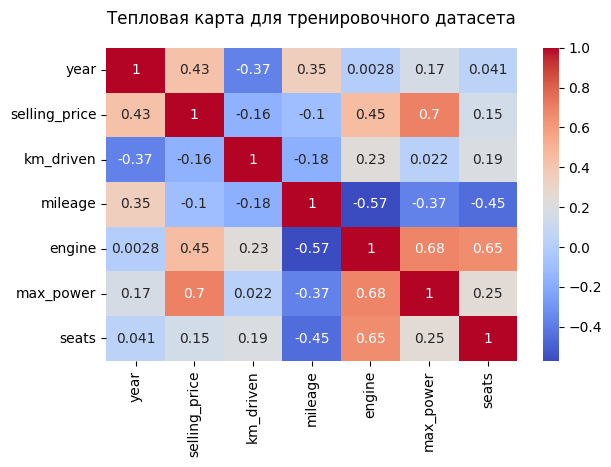

In [15]:

display_markdown(
    "<h3>Коэффициенты корреляции Пирсона для тренировочного датасета:</h3>",
    raw=True
)

train_corr = df_train.corr(numeric_only=True)

display(train_corr)

sns.heatmap(
    train_corr,
    annot=True,
    cmap="coolwarm",
)

plt.title("Тепловая карта для тренировочного датасета", y=1.05)

plt.tight_layout()
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответы на вопросы:**
1. Какие 2 признака наименее скоррелированы между собой?
    - `engine` и `year` - имеют самую слабую корреляцию, практически ноль
2. Между какими наблюдается довольно сильная положительная линейная зависимость?
    - `max_power` и `engine` - имеют сильную корреляцию, а если говорить про влияние на таргет, то `max_power`
    - Еще сильная корреляция между `engine` и `seats`, что как-то странно для меня
3. Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
    - Да, все так, но корреляция не сильно большая. В целом на графиках это тоже прослеживалось, но тоже не сильно

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Они уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [16]:
# Создал словарик для предсказаний моделей, чтобы потом применить бизнес метрику

test_preds: dict[str, np.ndarray] = dict()

In [17]:
X_train = df_train[df_train.describe().columns.to_list()].drop(["selling_price"], axis=1)
y_train = df_train["selling_price"].copy()

display_markdown(
    "<h3>Вещественные признаки для тренировочного набора:</h3>",
    raw=True
)
display(X_train.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Значения целевой переменной для тренировочного набора:</h3>",
    raw=True
)
display(y_train.head())

<h3>Вещественные признаки для тренировочного набора:</h3>

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


<hr>

<h3>Значения целевой переменной для тренировочного набора:</h3>

0    450000
1    370000
2    225000
3    130000
4    440000
Name: selling_price, dtype: int64

In [18]:
X_test = df_test[df_test.describe().columns.to_list()].drop(["selling_price"], axis=1)
y_test = df_test["selling_price"].copy()

display_markdown(
    "<h3>Вещественные признаки для тестового набора:</h3>",
    raw=True
)
display(X_test.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Значения целевой переменной для тестового набора:</h3>",
    raw=True
)
display(y_test.head())

<h3>Вещественные признаки для тестового набора:</h3>

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.0,2498,112.0,7
1,2017,25000,21.5,1497,108.5,5
2,2007,218463,12.9,1799,130.0,5
3,2015,173000,25.1,1498,98.6,5
4,2011,70000,16.5,1172,65.0,5


<hr>

<h3>Значения целевой переменной для тестового набора:</h3>

0    229999
1    665000
2    175000
3    635000
4    130000
Name: selling_price, dtype: int64

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [19]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


def display_mse_r2(model, X: pd.DataFrame, y: pd.Series) -> np.ndarray:
    predictions = model.predict(X)

    display_markdown(
        "<h4>Первые десять значений предсказаний:</h4>",
        raw=True
    )
    display(predictions[:10])

    display_markdown("<br>", raw=True)

    display_markdown(
        f"<h4>&radic;MSE: {MSE(y, predictions) ** 0.5:.2f}</h4>",
        raw=True
    )
    display_markdown(
        f"<h4>R<sup>2</sup>: {r2_score(y, predictions):.5f}</h4>",
        raw=True
    )

    return predictions


display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(lin_reg_model, X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["LinearRegression"] = display_mse_r2(lin_reg_model, X_test, y_test).copy()

display_markdown("<hr>", raw=True)

<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 367885.92132378,  702692.29085463,  415666.35930255,
        230545.1760136 ,  601132.08720307, -144505.33405672,
       -462189.10565165,  246279.23518786,  247823.2943304 ,
        771356.93035221])

<br>

<h4>&radic;MSE: 342346.46</h4>

<h4>R<sup>2</sup>: 0.59112</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 633417.63709638,  935522.26351574,  622728.36426593,
        678474.52829011,  163205.39455988, 1046774.85523072,
        147550.39981996,  429474.54839036,  -52621.95962305,
       1052359.26965365])

<br>

<h4>&radic;MSE: 483430.04</h4>

<h4>R<sup>2</sup>: 0.59344</h4>

<hr>

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [20]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.to_list())
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns.to_list())

display_markdown(
    "<h3>Как теперь выглядит тренировочный набор:</h3>",
    raw=True
)
display(X_train.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Как теперь выглядит тестовый набор:</h3>",
    raw=True
)
display(X_test.head())

lin_reg_model.fit(X_train, y_train)

display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(lin_reg_model, X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["LinearRegression + StandartScaler"] = display_mse_r2(lin_reg_model, X_test, y_test).copy()

display_markdown("<hr>", raw=True)

<h3>Как теперь выглядит тренировочный набор:</h3>

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.999351,-0.373643,-0.430674,-0.434419
1,0.139570,0.766619,0.432468,0.141162,0.500123,-0.434419
2,-0.837167,0.883158,0.899018,-0.068879,0.073823,-0.434419
3,-1.569719,0.766619,-0.831730,-0.270682,0.017067,-0.434419
4,0.872122,-0.482007,0.181635,-0.478663,-0.182840,-0.434419


<hr>

<h3>Как теперь выглядит тестовый набор:</h3>

,year,km_driven,mileage,engine,max_power,seats
0,-0.837167,1.565740,-1.358480,2.200379,0.767507,1.601702
1,0.872122,-0.814974,0.522768,0.139102,0.657148,-0.434419
2,-1.569719,2.405866,-1.634396,0.760986,1.335066,-0.434419
3,0.383754,1.648982,1.425768,0.141162,0.344990,-0.434419
4,-0.592983,-0.065798,-0.731397,-0.530144,-0.714454,-0.434419


<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 367885.92132372,  702692.29085461,  415666.35930252,
        230545.17601356,  601132.08720304, -144505.3340568 ,
       -462189.10565167,  246279.23518782,  247823.29433035,
        771356.93035221])

<br>

<h4>&radic;MSE: 342346.46</h4>

<h4>R<sup>2</sup>: 0.59112</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 633417.63709638,  935522.26351576,  622728.3642659 ,
        678474.52829006,  163205.39455985, 1046774.8552308 ,
        147550.39981992,  429474.54839034,  -52621.9596231 ,
       1052359.26965364])

<br>

<h4>&radic;MSE: 483430.04</h4>

<h4>R<sup>2</sup>: 0.59344</h4>

<hr>

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [21]:
weights = lin_reg_model.coef_
features = X_train.columns.to_list()
f_w_df = pd.DataFrame({"Features": features, "Weights": weights, "ABS": abs(weights)}).sort_values(by="ABS", ascending=False)

display_markdown(
    "<h3>Подобранные веса:</h3>",
    raw=True
)
display(f_w_df)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Самым важным признаком оказался: "
    f"{f_w_df.iloc[0]["Features"]}, со значением {f_w_df.iloc[0]["Weights"]:.2f}</h3>",
    raw=True
)

<h3>Подобранные веса:</h3>

,Features,Weights,ABS
4,max_power,323433.991704,323433.991704
0,year,148299.004372,148299.004372
3,engine,61079.366987,61079.366987
1,km_driven,-44809.059947,44809.059947
2,mileage,29480.643701,29480.643701
5,seats,-23611.628719,23611.628719


<hr>

<h3>Самым важным признаком оказался: max_power, со значением 323433.99</h3>

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [22]:
lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(lasso_model, X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["Lasso"] = display_mse_r2(lasso_model, X_test, y_test).copy()

display_markdown("<hr>", raw=True)

<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 367885.53275025,  702690.83225213,  415664.96646727,
        230547.97197598,  601131.94514242, -144500.5754363 ,
       -462187.59311565,  246276.48658782,  247823.31889786,
        771356.0086996 ])

<br>

<h4>&radic;MSE: 342346.46</h4>

<h4>R<sup>2</sup>: 0.59112</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 633416.75204975,  935518.86317538,  622730.71043668,
        678472.01342329,  163207.47756518, 1046766.2941598 ,
        147552.80006527,  429475.98765249,  -52618.12294214,
       1052357.05603887])

<br>

<h4>&radic;MSE: 483430.73</h4>

<h4>R<sup>2</sup>: 0.59343</h4>

<hr>

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [23]:
lasso_searcher = GridSearchCV(
    Lasso(),
    {"alpha": np.logspace(-4, 4, 10)},
    cv=10,
)

lasso_searcher.fit(X_train, y_train)

best_lasso_model: Lasso = lasso_searcher.best_estimator_

display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(best_lasso_model, X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["Lasso + GridSearchCV"] = display_mse_r2(best_lasso_model, X_test, y_test).copy()

display_markdown("<hr>", raw=True)

weights = best_lasso_model.coef_
features = X_train.columns.to_list()
f_w_df = pd.DataFrame({"Features": features, "Weights": weights, "ABS": abs(weights)}).sort_values(by="ABS", ascending=False)

display_markdown(
    "<h3>Подобранные веса:</h3>",
    raw=True
)
display(f_w_df)

display_markdown("<hr>", raw=True)

display_markdown(
    f"<h3>Самым лучшим alpha оказался: {lasso_searcher.best_params_["alpha"]}</h3>",
    raw=True
)

<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 365110.59004347,  689841.89456851,  402423.21181586,
        258775.24226881,  600624.79119497,  -96854.04618543,
       -444001.78973393,  220893.69588291,  251479.68967228,
        763373.94572656])

<br>

<h4>&radic;MSE: 343613.46</h4>

<h4>R<sup>2</sup>: 0.58809</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 625343.2839526 ,  903246.71845594,  649031.12917371,
        655112.90382197,  185377.46489738,  968923.84869949,
        171062.9086353 ,  443819.48387054,  -15778.07222206,
       1031628.80460474])

<br>

<h4>&radic;MSE: 490858.83</h4>

<h4>R<sup>2</sup>: 0.58084</h4>

<hr>

<h3>Подобранные веса:</h3>

,Features,Weights,ABS
4,max_power,330169.197836,330169.197836
0,year,147250.919447,147250.919447
1,km_driven,-33395.191897,33395.191897
3,engine,17368.067891,17368.067891
2,mileage,10068.943820,10068.943820
5,seats,-0.000000,0.000000


<hr>

<h3>Самым лучшим alpha оказался: 10000.0</h3>

**Ответы на вопросы:**
1. Сколько грид-сёрчу пришлось обучать моделей?
    - 10 фолдов кросс валидации и шаг в логспейсе 10, итого 10*10=100
2. Какой коэффициент регуляризации у лучшей из перебранных моделей?
    - Лучшим значением коэффициента регуляризации оказалось 10000
3. Занулились ли какие-нибудь из весов при такой регуляризации?
    - Да, вес для столбца `seats` занулился

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [24]:
elastic_searcher = GridSearchCV(
    ElasticNet(),
    {
        "alpha": np.logspace(-4, 4, 10),
        "l1_ratio": np.linspace(0.1, 1, 10)
    },
    cv=10,
)

elastic_searcher.fit(X_train, y_train)

best_elastic_model: ElasticNet = elastic_searcher.best_estimator_

display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(best_elastic_model, X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["ElasticNet + GridSearchCV"] = display_mse_r2(best_elastic_model, X_test, y_test).copy()

display_markdown("<hr>", raw=True)

weights = best_elastic_model.coef_
features = X_train.columns.to_list()
f_w_df = pd.DataFrame({"Features": features, "Weights": weights, "ABS": abs(weights)}).sort_values(by="ABS", ascending=False)

display_markdown(
    "<h3>Подобранные веса:</h3>",
    raw=True
)
display(f_w_df)

display_markdown("<hr>", raw=True)

display_markdown(
    f"<h3>Самым лучшим alpha оказался: {elastic_searcher.best_params_["alpha"]}</h3>",
    raw=True
)
display_markdown(
    f"<h3>Самым лучшим l1_ratio оказался: {elastic_searcher.best_params_["l1_ratio"]}</h3>",
    raw=True
)

<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 371822.83583038,  672130.06533648,  408170.17892056,
        243239.26651144,  592840.40939385,  -93251.61568415,
       -367206.91341489,  274538.42846426,  277225.15732911,
        736723.10779131])

<br>

<h4>&radic;MSE: 345329.16</h4>

<h4>R<sup>2</sup>: 0.58396</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 653916.08507936,  891913.4955624 ,  589199.60326554,
        644305.48123602,  202596.25780221, 1059325.84291325,
        182196.07017136,  427692.00144634,   -4207.78302648,
        987032.93820398])

<br>

<h4>&radic;MSE: 501736.98</h4>

<h4>R<sup>2</sup>: 0.56206</h4>

<hr>

<h3>Подобранные веса:</h3>

,Features,Weights,ABS
4,max_power,268761.876516,268761.876516
0,year,139728.553832,139728.553832
3,engine,82090.660141,82090.660141
1,km_driven,-46475.067951,46475.067951
5,seats,-23611.212088,23611.212088
2,mileage,20897.653582,20897.653582


<hr>

<h3>Самым лучшим alpha оказался: 0.3593813663804626</h3>

<h3>Самым лучшим l1_ratio оказался: 0.6</h3>

**Ответы на вопросы:**
1. Сколько грид-сёрчу пришлось обучать моделей?
    - 10 фолдов кросс валидации, шаг в логспейсе 10 для альфа и шаг линспейса для l1_score 10, итого 10**10=1000
2. Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
    - Лучшим значением коэффициента регуляризации оказалось 0.36
    - Лучшим значением l1_ratio оказалось 0.6

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [25]:
# Для трейна и теста вытаскиваем категориальные столбцы и столбец `seats` с удалением столбца `name`
# Потом соединяем преобработанные вещественные столбцы и категориальные столбцы, с удалением `seats` из первого
X_train_only_cat = df_train[df_train.describe(include="object").columns.to_list() + ["seats"]].drop(["name"], axis=1)
X_train_cat = pd.concat([X_train.drop(["seats"], axis=1), X_train_only_cat], axis=1)

X_test_only_cat = df_test[df_test.describe(include="object").columns.to_list() + ["seats"]].drop(["name"], axis=1)
X_test_cat = pd.concat([X_test.drop(["seats"], axis=1), X_test_only_cat], axis=1)

display_markdown(
    "<h3>Как теперь выглядит тренировочный набор:</h3>",
    raw=True
)
display(X_train_cat.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Как теперь выглядит тестовый набор:</h3>",
    raw=True
)
display(X_test_cat.head())

<h3>Как теперь выглядит тренировочный набор:</h3>

,year,km_driven,mileage,engine,max_power,fuel,seller_type,transmission,owner,seats
0,0.139570,1.191152,0.999351,-0.373643,-0.430674,Diesel,Individual,Manual,First Owner,5
1,0.139570,0.766619,0.432468,0.141162,0.500123,Diesel,Individual,Manual,Second Owner,5
2,-0.837167,0.883158,0.899018,-0.068879,0.073823,Diesel,Individual,Manual,First Owner,5
3,-1.569719,0.766619,-0.831730,-0.270682,0.017067,Petrol,Individual,Manual,First Owner,5
4,0.872122,-0.482007,0.181635,-0.478663,-0.182840,Petrol,Individual,Manual,First Owner,5


<hr>

<h3>Как теперь выглядит тестовый набор:</h3>

,year,km_driven,mileage,engine,max_power,fuel,seller_type,transmission,owner,seats
0,-0.837167,1.565740,-1.358480,2.200379,0.767507,Diesel,Individual,Manual,First Owner,7
1,0.872122,-0.814974,0.522768,0.139102,0.657148,Diesel,Individual,Manual,First Owner,5
2,-1.569719,2.405866,-1.634396,0.760986,1.335066,Petrol,Individual,Automatic,First Owner,5
3,0.383754,1.648982,1.425768,0.141162,0.344990,Diesel,Individual,Manual,First Owner,5
4,-0.592983,-0.065798,-0.731397,-0.530144,-0.714454,Petrol,Individual,Manual,Second Owner,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [26]:
assert X_train_cat.shape == (5840, 10)

In [27]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [28]:
encoder = OneHotEncoder(drop="first", sparse_output=False)

encoder.fit(X_train_only_cat)

# Энкодаем категориальные столбцы и `seats`, а потом обхединяем с предобработанными вещественными признаками
encoded_X_train_only_cat = pd.DataFrame(encoder.transform(X_train_only_cat), columns=encoder.get_feature_names_out(X_train_only_cat.columns.to_list()))
encoded_X_train = pd.concat([X_train.drop(["seats"], axis=1), encoded_X_train_only_cat], axis=1)

encoded_X_test_only_cat = pd.DataFrame(encoder.transform(X_test_only_cat), columns=encoder.get_feature_names_out(X_test_only_cat.columns.to_list()))
encoded_X_test = pd.concat([X_test.drop(["seats"], axis=1), encoded_X_test_only_cat], axis=1)

display_markdown(
    "<h3>Как теперь выглядит тренировочный набор:</h3>",
    raw=True
)
display(encoded_X_train.head())

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Как теперь выглядит тестовый набор:</h3>",
    raw=True
)
display(encoded_X_test.head())

<h3>Как теперь выглядит тренировочный набор:</h3>

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.999351,-0.373643,-0.430674,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.432468,0.141162,0.500123,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.837167,0.883158,0.899018,-0.068879,0.073823,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.831730,-0.270682,0.017067,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.181635,-0.478663,-0.182840,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<hr>

<h3>Как теперь выглядит тестовый набор:</h3>

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,-0.837167,1.565740,-1.358480,2.200379,0.767507,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.872122,-0.814974,0.522768,0.139102,0.657148,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.569719,2.405866,-1.634396,0.760986,1.335066,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.383754,1.648982,1.425768,0.141162,0.344990,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.592983,-0.065798,-0.731397,-0.530144,-0.714454,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [29]:
ridge_searcher = GridSearchCV(
    Ridge(),
    {"alpha": np.logspace(-4, 4, 10)},
    cv=10,
    scoring="r2",
)

ridge_searcher.fit(encoded_X_train, y_train)

best_ridge_model: Lasso = ridge_searcher.best_estimator_

display_markdown(
    "<h3>Метрики качества для тренировочного датасета:</h3>",
    raw=True
)
display_mse_r2(best_ridge_model, encoded_X_train, y_train)

display_markdown("<hr>", raw=True)

display_markdown(
    "<h3>Метрики качества для тестового датасета:</h3>",
    raw=True
)
test_preds["Ridge + GridSearchCV"] = display_mse_r2(best_ridge_model, encoded_X_test, y_test).copy()

display_markdown("<hr>", raw=True)

weights = best_ridge_model.coef_
features = encoded_X_train.columns.to_list()
f_w_df = pd.DataFrame({"Features": features, "Weights": weights, "ABS": abs(weights)}).sort_values(by="ABS", ascending=False)

display_markdown(
    "<h3>Подобранные веса:</h3>",
    raw=True
)
display(f_w_df)

display_markdown("<hr>", raw=True)

display_markdown(
    f"<h3>Самым лучшим alpha оказался: {ridge_searcher.best_params_["alpha"]}</h3>",
    raw=True
)

<h3>Метрики качества для тренировочного датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([393659.34390544, 622264.64011744, 418297.01047903, 183345.12044009,
       537108.15383084,  -4405.9789862 , -40151.48207442, 266422.45241857,
       276326.01996666, 674994.474062  ])

<br>

<h4>&radic;MSE: 318266.14</h4>

<h4>R<sup>2</sup>: 0.64662</h4>

<hr>

<h3>Метрики качества для тестового датасета:</h3>

<h4>Первые десять значений предсказаний:</h4>

array([ 614723.47370649,  878869.8842235 ,  812151.40826807,
        669703.57553066,   77279.97474038, 1038834.74689457,
        121700.2379236 ,  319378.43037903,  -95732.30845923,
        979354.71006356])

<br>

<h4>&radic;MSE: 451634.36</h4>

<h4>R<sup>2</sup>: 0.64516</h4>

<hr>

<h3>Подобранные веса:</h3>

,Features,Weights,ABS
13,owner_Test Drive Car,513823.977592,513823.977592
15,seats_4,388111.314086,388111.314086
10,transmission_Manual,-289722.731510,289722.731510
4,max_power,288952.208573,288952.208573
0,year,141841.852543,141841.852543
17,seats_6,-122180.230426,122180.230426
8,seller_type_Individual,-113253.995610,113253.995610
16,seats_5,-91919.961823,91919.961823
6,fuel_LPG,83677.577074,83677.577074
18,seats_7,-81764.908965,81764.908965


<hr>

<h3>Самым лучшим alpha оказался: 21.54434690031882</h3>

**Ответы на вопросы:**
1. Удалось ли улучшить качество прогнозов?
    - Качество удалось улучшить на 6% по $R^2$ метрике

In [30]:
# Засуним все в итоговый тренировочный и тестовый датасет

X_train = encoded_X_train.copy()
X_test = encoded_X_test.copy()

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [31]:
converted_y_test = np.array(y_test)


def business_metric(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(abs(y_pred - y_true) <= 0.1 * y_true)


for model_name, preds in test_preds.items():
    result = business_metric(converted_y_test, preds)
    display_markdown(
        f"<h3>Значение бизнес метрики для {model_name}: {result:.5f}</h3>",
        raw=True
    )

    display_markdown("<hr>", raw=True)

<h3>Значение бизнес метрики для LinearRegression: 0.22100</h3>

<hr>

<h3>Значение бизнес метрики для LinearRegression + StandartScaler: 0.22100</h3>

<hr>

<h3>Значение бизнес метрики для Lasso: 0.22100</h3>

<hr>

<h3>Значение бизнес метрики для Lasso + GridSearchCV: 0.22800</h3>

<hr>

<h3>Значение бизнес метрики для ElasticNet + GridSearchCV: 0.24600</h3>

<hr>

<h3>Значение бизнес метрики для Ridge + GridSearchCV: 0.24600</h3>

<hr>

Очень странное задание, не знаю как надо было правильно: просто взять все до этого сделанные предикшаны по тестовой выборке или же на последних данных (после всех модернизаций) заново обучить все модели и получить предикшаны. Выбрал первый вариант.

**Итог: лучшая модели Ridge + GridSearchCV и ElasticNet + GridSearchCV**

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.